## Means Testing

#### A Note on the Central Limit Theorem

If you have a population (regardless of distribution) with mean μ and take sufficiently large random samples (usually N > 30 [for each independent sample]) from the population, then the distribution of the sample means will be approximately normally distributed

In [97]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
#simulate rolling a die
roll = stats.randint(1,7)

In [99]:
#roll it 100,000 times
roll.rvs(100_000)

array([5, 1, 5, ..., 5, 2, 3])

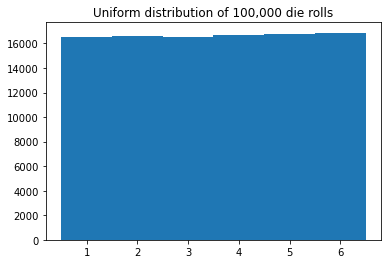

In [100]:
plt.hist(roll.rvs(100_000),
         bins=[1,2,3,4,5,6,7],
         align='left')
plt.title('Uniform distribution of 100,000 die rolls')
plt.show()

In [101]:
roll.rvs(100_000).mean()

3.50323

### Distribution of sample means 
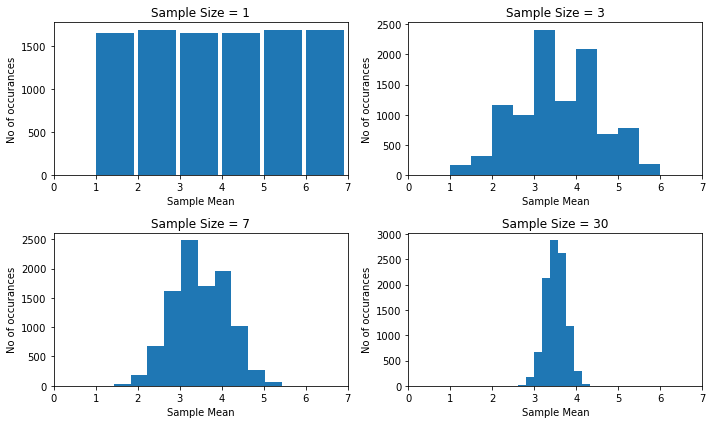

# Comparing Means


_______________________________________________________________________

|Goal|$H_{0}$|Data Needed|Parametric Test|Assumptions*||  
|---|---|---|---|---|---|  
|Compare observed mean to theoretical one|$\mu_{obs} = \mu_{th}$|array-like of observed values & float of theoretical|One sample t-test: scipy.stats.ttest_1samp|Normally Distributed\*\*||   
|Compare two observed means (independent samples)|$\mu_{a} = \mu_{b}$|2 array-like samples|Independent t-test (or 2-sample): scipy.stats.ttest_ind|Independent, Normally Distributed\*\*, Equal Variances\*\*\*||   
|Compare several observed means (independent samples)|$\mu_{a} = \mu_{b} = \mu_{n}$|n array-like samples|ANOVA: scipy.stats.f_oneway|Independent, Normally Distributed\*\*, Equal Variances**||   

\*If assumptions can't be met, the equivalent non-parametric test can be used.  
\*\*Normal Distribution assumption can be be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.   
\*\*\*The argument in the stats.ttest_ind() method of `equal_var` can be set to `False` to accomodate this assumption.   

## One Sample T-Test

Goal: Compare observed mean to theoretical one. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{obs} = \mu_{th}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{obs} != \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly smaller)|$H_{a}$|$\mu_{obs} < \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly larger)|$H_{a}$|$\mu_{obs} > \mu_{th}$|      

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions: Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  

5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.ttest_1samp`. 

6. Decide. **For a 2-tailed test, we take the p-value as is. For a 1-tailed test, we evaluate $p/2 < \alpha$ and $t > 0$ (to test if higher), and of a less-than test when $p/2 < \alpha$ and $t < 0$.**

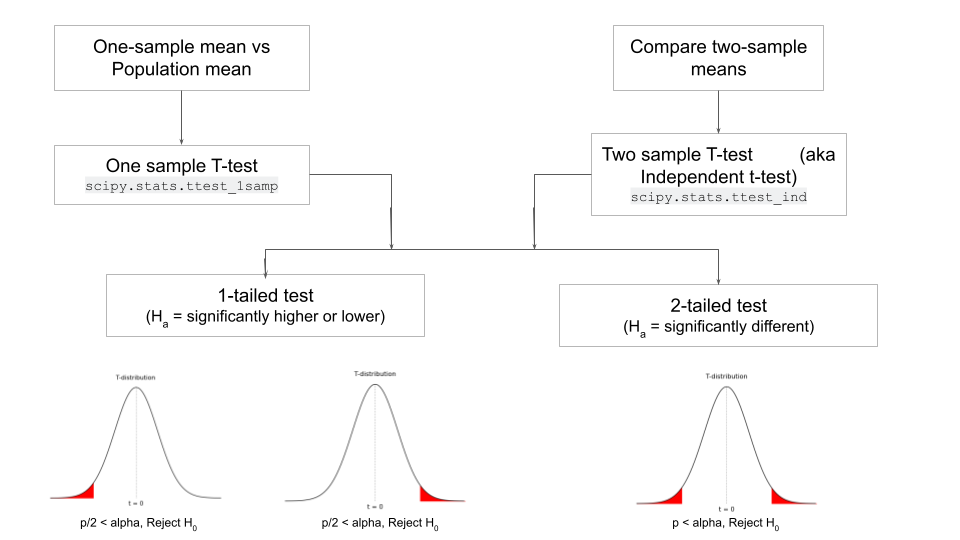

- t-statistic == 0 means no difference is means (i.e null hypothesis is true)
- Only when t-statistic is larger enough (positive or negative) we are confident that means are different enough to reject null

### Example 1

I believe customers who churn are charged more (monthly average) than the overall average monthly charges.  
Is the mean of monthly charges of customers who churn significantly higher than the mean across all customers? 

We will use a 1-tailed ("significantly higher"), 1-sample (comparing 1 group to the average) t-test.  

In [102]:
# read the csv file 
df = pd.read_csv('telco_churn - telco_churn.csv')

In [103]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**A. Plot Distribution**

In [105]:
df.MonthlyCharges

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [106]:
# Think about ways we could frame the ideas of tests here:
#   - this data hypothetically represents the population of all telco customers, and the monthly charges here should 
# be an approximation of the overall monthly charges of the popoulation if the sample size is fair and unbiased
#   - If talking about 1-sample test, df.MonthlyCharges.mean() = overall theoretical mean value
#   - 1-sample test would involve looking at a sample and comparing the mean to this value

#   - Do senior citizens pay on average a different amount per month than customers as a whole? (μ_th)

In [107]:
# Ho: seniors pay the same or less on average
# Ha: seniors pay more than population on average

# 1 tail, 1 sample test due to directionality 

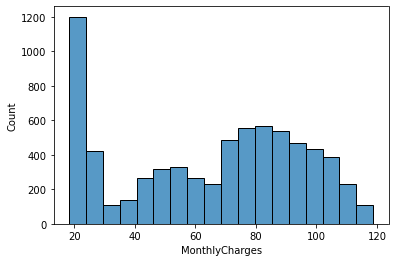

In [108]:
# plot distribution of monthly charges
sns.histplot(df.MonthlyCharges)
plt.show()
# Distribution of *ALL* customers in the data set's monthly charges


In [109]:
μth = df.MonthlyCharges.mean()

In [110]:
μth

64.76169246059922

In [111]:
# select sample of only churned customers
churned = df[df.Churn == 'Yes']

In [112]:
# mean of churned customers monthly charges
churned.MonthlyCharges.mean()

74.4413322632423

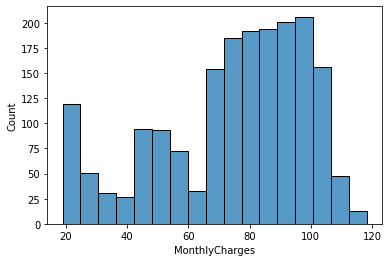

In [113]:
# plot distribution of montly charges for customer who churn
sns.histplot(churned.MonthlyCharges)
plt.show()

In [114]:
churned.MonthlyCharges.shape, df.MonthlyCharges.shape

((1869,), (7043,))

**B. Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers = Mean of monthly charges of all customers  
$H_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of all customers  

**C. Set Alpha**

In [115]:
α = 0.05

**D. Verify Assumptions**

In [116]:
# How big is sample size for churned customers?
# If sample size is significantly > 30, we don't have to worry about normality (CLT!!)
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Our churn sample is large enough, as is overall count, to meet the assumptions of normal distributions. 

**E. Compute test statistic and probability (t-statistic & p-value)**

- scipy.stats.ttest_1samp
- For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼  and  𝑡 > 0. 

In [117]:
μth, churned.MonthlyCharges.mean()

(64.76169246059922, 74.4413322632423)

In [118]:
# calculate t-stat and p-value
tstat, pval = stats.ttest_1samp(churned.MonthlyCharges, μth)

In [119]:
tstat, pval

(16.965403080505645, 3.7406392993841064e-60)

**F. Decide**

Is 1/2 * p < alpha AND t > 0? 

Is $t > 0$ and $p/2 < \alpha$

In [120]:
.5*pval < α, tstat > 0

(True, True)

In [121]:
# because both are true, we reject the null hypothesis 

## Example 2

**A. Distributions** See above

**B. Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers = Mean of monthly charges of all customers  
$H_{a}$: Mean of monthly charges of churned customers != Mean of monthly charges of all customers  

**C. Set Alpha** See above  

**D. Assumptions** See above  

**E. Compute test statistics**

In [122]:
t, p = stats.ttest_1samp(churned.MonthlyCharges, μth)
t, p

(16.965403080505645, 3.7406392993841064e-60)

**F. Is p-value less than alpha?**

In [123]:
p < α

True

In [124]:
# can reject the null hypothesis
# there is inequality in churned vs population of customers' Monthly Charges

## Independent T-Test (a.k.a. Two Sample T-Test)

Goal: Compare mean of group a to mean of group b. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{a} == \mu_{b}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{a} != \mu_{b}$|  
|Alternative Hypothesis (1-tail, a is significantly smaller than b)|$H_{a}$|$\mu_{a} < \mu_{b}$|  
|Alternative Hypothesis (1-tail, a is significantly larger than b)|$H_{a}$|$\mu_{a} > \mu_{b}$|      

3. Set Significance Level: $\alpha = .05$ (in other words Confidence level is 0.95)

4. Verify Assumptions:  
    - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  
    - Independent samples  
    - Equal Variances (or set method argument to False when not)


5. Compute test statistic and probability (t-statistic & p-value) using `stats.ttest_ind`

6. Decide. 

### Example 1

I believe customers who churn are charged more (monthly average) than customers who don't churn. 
Is the mean of monthly charges of customers who churn significantly higher than the mean of those who don't churn? 

We will use a 1-tailed ("significantly higher"), 2-sample (comparing 2 groups) t-test.  

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

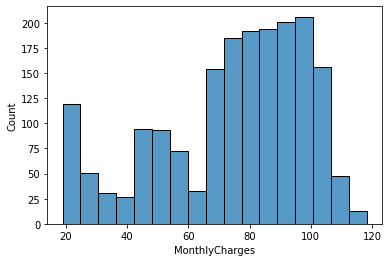

In [125]:
# histogram of churned customers
sns.histplot(churned.MonthlyCharges)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

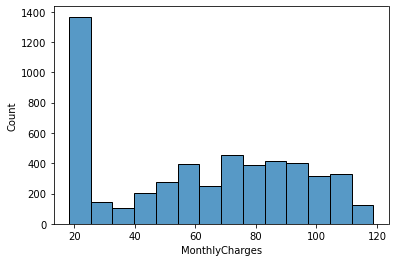

In [126]:
# histogram of non-churned customers
nchurned = df[df.Churn == 'No']
sns.histplot(nchurned.MonthlyCharges)


In [127]:
μa = df[df.Churn == 'Yes'].MonthlyCharges.mean()
μb = df[df.Churn == 'No'].MonthlyCharges.mean()

In [128]:
μa, μb, μth

(74.4413322632423, 61.2651236953999, 64.76169246059922)

**Set Hypothesis**

$H_{0}$: Mean of monthly charges for churned <= mean of monthly charges for not churned
$H_{a}$: Mean of monthly charges for churned > mean of monthly charges for not churned

**Set Alpha**

In [129]:
alpha = .05

**Verify Assumptions**

1. Independent Samples. YES! no observations in the churn sample exist in the no-churn sample. 

2. Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT).  YES! Plenty of observations

3. Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).

In [130]:
stat, pval = stats.levene(churned.MonthlyCharges, nchurned.MonthlyCharges)
pval

1.0261244899421871e-78

In [131]:
# reject idea that variances are equal because the pval is super small

If no, we will set the argument of equal_var to False. 


**Compute Test Statistic**

In [156]:
# implications of one-tailed two-sampled t-test:
# p will be divided by two because we are only looking at one tail of the curve
# we will pay attention to the sign of our t-statistic
# t, p = t-test: (group A, group B) ==> comparison of mu_a > mu_b

t, p = stats.ttest_ind(churned.MonthlyCharges, nchurned.MonthlyCharges, equal_var = False)
t, p

(18.407526676414673, 8.592449331547539e-73)

**Decide**

In [157]:
t > 0

True

In [158]:
p/2 < α

True

In [135]:
# reject the null hypothesis

## Example 2

Are charges of customers who churn *significantly different* than those who do not churn? 

$H_{0}$: Monthly charges for churned customer == monthly charges for not churned customers  

$H_{a}$: Monthly charges for churned customer != monthly charges for not churned customers



In [136]:
t, p = stats.ttest_ind(churned.MonthlyCharges, nchurned.MonthlyCharges)

In [137]:
p < α

True

**Decide**

Is the p-value less than alpha?

## Example 3

Are charges of customers who churn *significantly less* than those who do not churn? 

$H_{0}$: mean monthly charges churned >= mean monthly charges not churned

$H_{a}$: mean monthly charges churned < mean monthly charges not churned

In [138]:
t, p = stats.ttest_ind(churned.MonthlyCharges, nchurned.MonthlyCharges)

**Decide**

is t < 0? AND is p/2 < alpha?


In [139]:
t < 0

False

In [140]:
p/2 < α

True

In [141]:
# accept the null hypothesis

## Summary
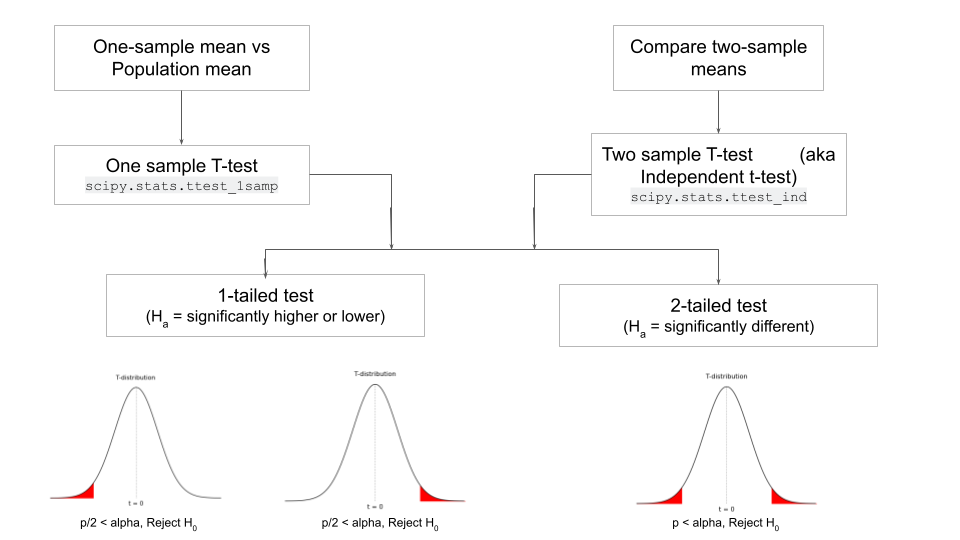

### MPG Example

#### Do the vehicle built in USA have different HP than vehicle from Japan?

In [148]:
# two sample, two tails

**Plot Distribution**

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

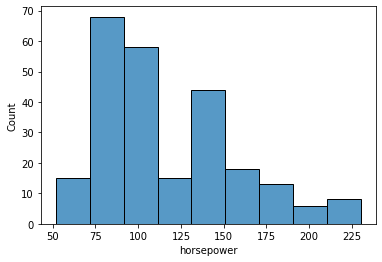

In [149]:
sns.histplot(usa.horsepower)

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

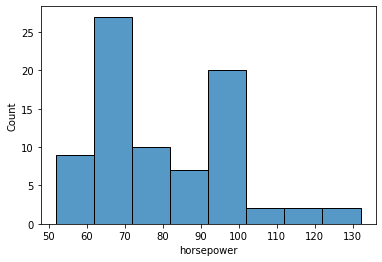

In [150]:
sns.histplot(japan.horsepower)

**Hypothesis**

$H_{0}$: hp is the same for usa and japan origin vehicles

$H_{a}$: hp is not the for usa and japan origin vehicles

**Significance Level**

$\alpha$ is already set to .05 (95% cofidence level)

**Verify Assumptions**

- Normal: yes!
- Independent: yes!
- Variance: No

In [151]:
stat, pval = stats.levene(churned.MonthlyCharges, nchurned.MonthlyCharges)

In [152]:
pval

1.0261244899421871e-78

In [159]:
# do two sample have similar variances?
# No


Looking at the variances, they are very different, so I will move forward with a 2-sample, independent t-test comparing usa made cars vs. japan made cars and set equal_var = False). 

In [160]:
# use Scipy's independent ttest to find t and p
t, p = stats.ttest_ind(usa.horsepower, japan.horsepower, equal_var = False)


**Decide**

is p-value less than alpha? 

In [161]:
p < α

False

Reject null hypothesis. The hp of usa cars vs. japan cars is significantly different. 

### Mini Exercise:

In [162]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Are the USA origin vehicles heavier than vehicles with japan origin?

In [163]:
usa = mpg[mpg.origin == 'usa']
japan = mpg[mpg.origin == 'japan']

#### Decide?

One sample t-test or 2-sample t-test?  
One tailed or two tailed?

Two-Sample T-test, 1-tailed

In [164]:
# 2 sample, 1 tail test

#### Plot distributions

<AxesSubplot:xlabel='weight', ylabel='Count'>

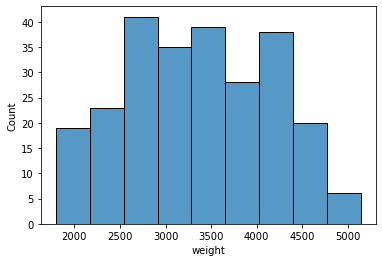

In [165]:
sns.histplot(usa.weight)

<AxesSubplot:xlabel='weight', ylabel='Count'>

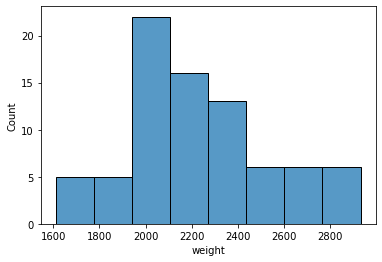

In [166]:
sns.histplot(japan.weight)

**Hypothesis**

$H_{0}$: average weight for usa origin vehicle <= average weight for japan origin vehicle

$H_{a}$: average weight for usa origin vehicle > average weight for japan origin vehicle



**Significance Level**

$\alpha$ = 0.05

**Verify Assumptions**

- Normal: Yes!
- Independent: Yes! 
- Variance: 

In [167]:
α = 0.05

In [184]:
stat, pval = stats.levene(usa.weight, japan.weight)
# pval large -> similar variance
# pval small -> variances differ -> set equal_var to False
pval < α

True

In [185]:
# variances are not equal

In [186]:
# use stats.ttest to calculate t and p
t, p = stats.ttest_ind(usa.weight, japan.weight, equal_var=False)

#### Decide

In [187]:
t > 0, p/2 < α

(True, True)

In [177]:
# reject the null hypothesis 